# PySCF


In [1]:
from project_utilities import *
from project_utilities import visualize_matrix as vis_mat
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
init_mpl(150) # initialize matplotlib at prefered settings

# Mol object

# Loading in .xyz file

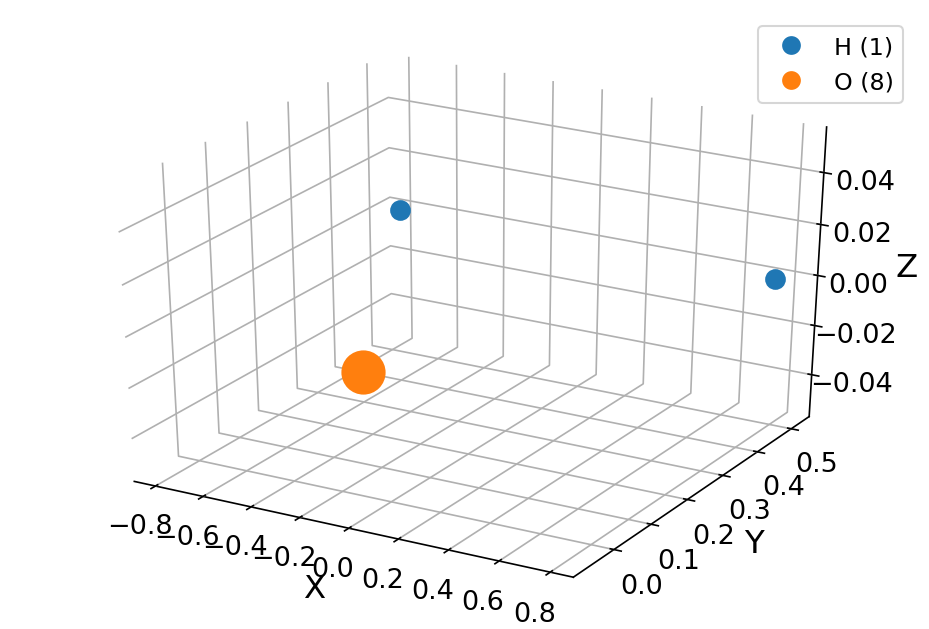

(0), H: [0.7763 0.512  0.    ]
(1), H: [-0.7763  0.512   0.    ]
(2), O: [ 0.     -0.0645 -0.    ]


In [3]:
mol = Mol() 
mol.read_xyz('xyz_files/water.xyz')
mol.vis_mol()
mol.print_geometry()

## Custom molecule

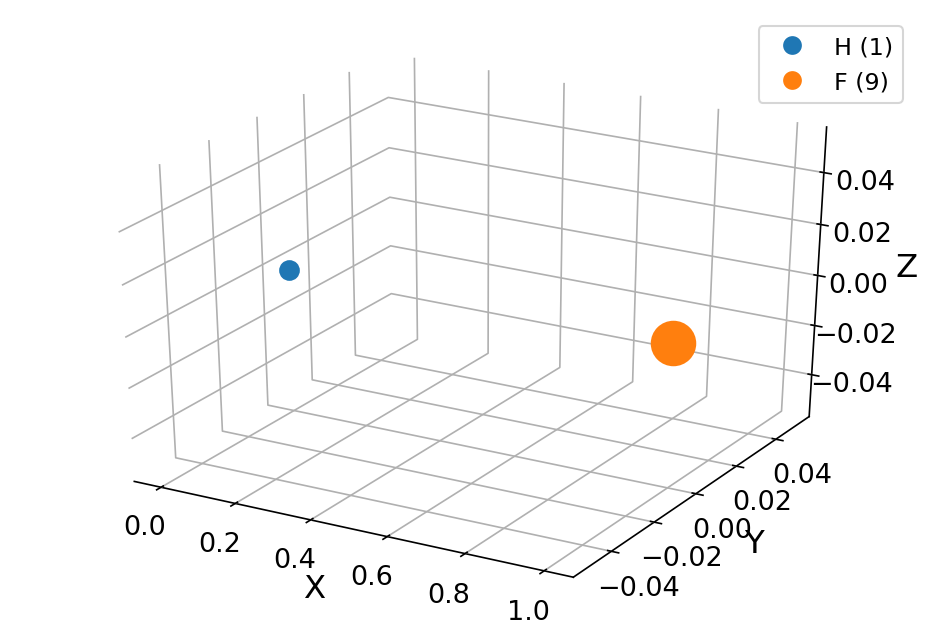

(0), H: [0 0 0]
(1), F: [1 0 0]


In [4]:
mol = Mol(atom_numbers = [1,9],coords = [[0,0,0],[1,0,0]]) ## HF molecule
mol.vis_mol()
mol.print_geometry()

## Save structure

In [5]:
string = mol.xyz_string()
f = open('HF.xyz','w')
f.write(string)
f.close()
######################### OR ######################
mol.output_xyz(name = 'HF',folder = 'geometries')

Geometry saved as: geometries/HF_4.xyz


## Rotate molecule in space

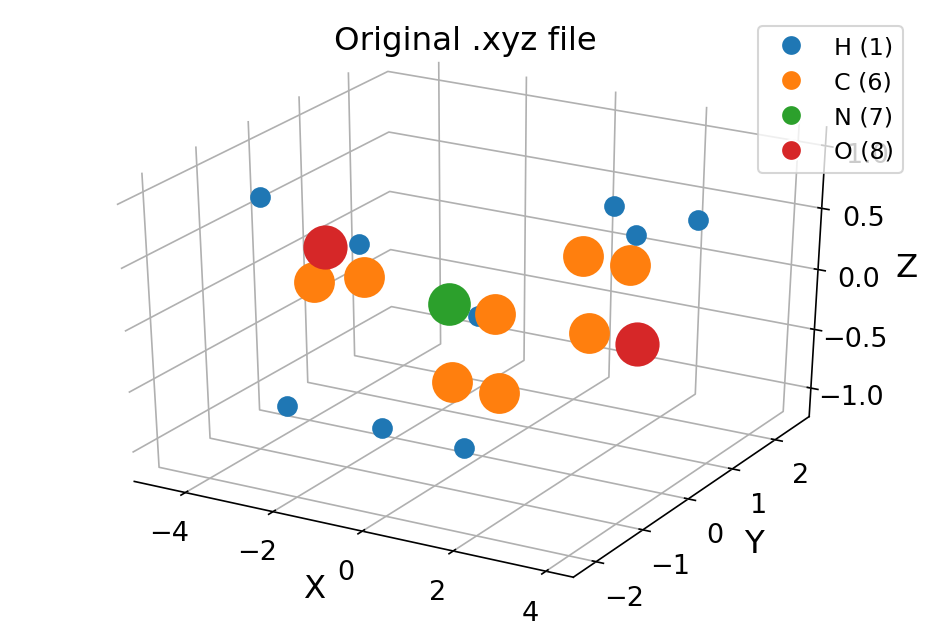

(0), H: [-4.1536  1.23   -0.0378]
(1), H: [-4.2813 -0.1968 -1.0943]
(2), H: [-1.8716  1.6564 -0.5825]
(3), H: [ 3.9624 -0.6904  0.9958]
(4), H: [ 1.8871 -2.1386 -0.4977]
(5), H: [-0.5084 -1.5961 -0.6498]
(6), H: [2.7499 1.9337 0.4684]
(7), H: [0.3553 2.4792 0.3125]
(8), H: [-4.5613 -0.3577  0.6561]
(9), C: [-3.9789  0.1564 -0.1085]
(10), C: [0.6912 1.4676 0.1387]
(11), C: [ 1.5499 -1.1281 -0.3196]
(12), C: [ 2.4673 -0.1363 -0.005 ]
(13), C: [ 0.2057 -0.8238 -0.4052]
(14), C: [2.0351 1.1619 0.2239]
(15), C: [-0.2276  0.4753 -0.1762]
(16), C: [-2.5138 -0.1288  0.0996]
(17), N: [-1.5914  0.7847 -0.2624]
(18), O: [ 3.7908 -0.4365  0.0786]
(19), O: [-2.1648 -1.1805  0.5929]


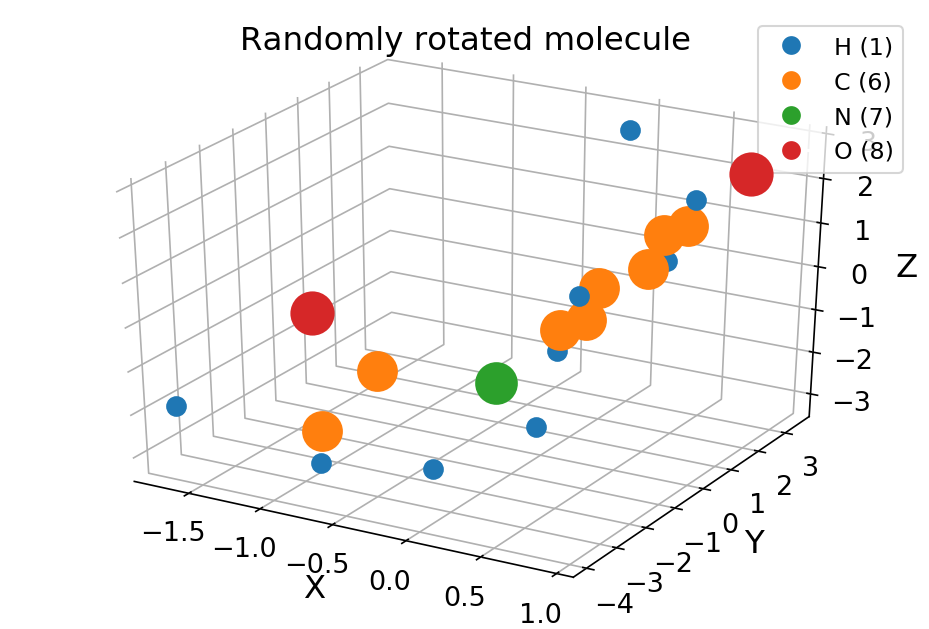

(0), H: [-0.92451289 -2.85706042 -3.12237146]
(1), H: [ 0.07173783 -3.90226869 -2.08156315]
(2), H: [ 0.13492007 -0.83903615 -2.42150133]
(3), H: [-0.05100802  3.16367417  2.67534063]
(4), H: [0.91881594 0.39016719 2.71772119]
(5), H: [ 0.51215485 -1.36867512  1.04530935]
(6), H: [ 0.18437048  3.3802711  -0.24559938]
(7), H: [-0.21838157  1.6229499  -1.92059108]
(8), H: [-1.6960972  -3.86826908 -1.87713153]
(9), C: [-0.81664262 -3.27196297 -2.12019611]
(10), C: [ 0.02723051  1.35390867 -0.90389971]
(11), C: [0.6687182  0.65842059 1.70183491]
(12), C: [0.57665678 1.99443532 1.34009951]
(13), C: [ 0.44077054 -0.32863759  0.76345572]
(14), C: [0.2554959  2.33992248 0.03548861]
(15), C: [ 0.11925855  0.01640752 -0.54246335]
(16), C: [-0.6798057  -2.14947758 -1.1239708 ]
(17), N: [-0.11264248 -0.98457565 -1.49501982]
(18), O: [0.80175663 2.96585827 2.26445266]
(19), O: [-1.0801358  -2.29447981  0.01177959]


In [6]:
mol = Mol()
mol.read_xyz('xyz_files/paracetamol.xyz')
mol.vis_mol(plot = False)
plt.title('Original .xyz file')
plt.show()
mol.print_geometry()
mol.rand_rotation()
mol.vis_mol(plot = False)
plt.title('Randomly rotated molecule')
plt.show()
mol.print_geometry()

# PySCF (https://sunqm.github.io/pyscf/)
## Doing a DFT calculation

In [7]:
from pyscf import gto, scf, cc, fci, dft

In [8]:
basis = 'sto-6g'
functional = 'pbe'
mol = Mol()
mol.read_xyz('xyz_files/ethanol.xyz')

mol1 = gto.M(atom=mol.pyscf_out(), basis=basis) ### Link Mol object to PySCF
mf = dft.rks.RKS(mol1) 
mf.xc = functional
mf.kernel()


converged SCF energy = -154.308127777613


-154.3081277776134

## Important features

In [9]:
# Pre-calculation
e = mol1.nelec[0] # Number of electrons/2 for closed-shell systems
S =  mol1.intor('int1e_ovlp_sph') # Overlap mattrix



# Post-calculation
E = mf.energy_tot() # Total energy
F = mf.get_fock() # Fock matrix
C = mf.mo_coeff # Coefficient matrix
MOs = mf.mo_energy # MO energies

## Potential energy surface

In [10]:
mol = Mol()
mol.read_xyz('xyz_files/ethanol.xyz')
mol.print_geometry()


(0), H: [-0.49334  0.93505  1.44716]
(1), H: [1.05522 0.04512 1.44808]
(2), H: [-0.64695 -1.12346  2.54219]
(3), H: [ 0.50112 -0.9164  -0.8044 ]
(4), H: [ 0.49999  0.86726 -0.84481]
(5), H: [-1.0431  -0.02739 -0.80544]
(6), C: [0.01247 0.02254 1.08262]
(7), C: [-0.00894 -0.01624 -0.43421]
(8), O: [-0.66442 -1.15471  1.56909]


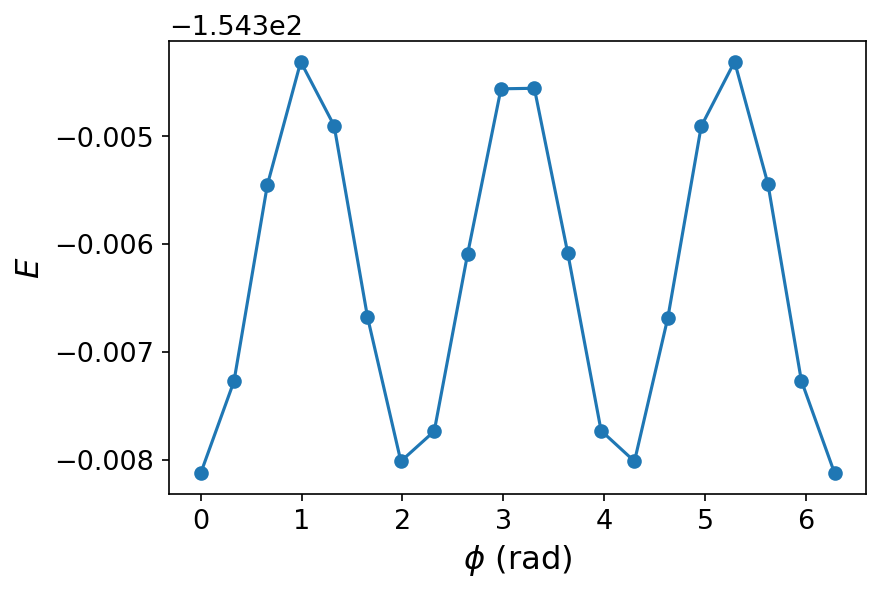

In [11]:
basis = 'sto-6g'
functional = 'pbe'
rotations = np.linspace(0,2*np.pi,20)
energies = []
for i in rotations:
    mol = Mol()
    mol.read_xyz('xyz_files/ethanol.xyz')
    mol.rotate_plane(index1 = 6, index2 = 7,angle = i) # Rotate one side of the plane separating atom 6 and 7
    mol1 = gto.M(atom=mol.pyscf_out(), basis=basis)
    mf = dft.rks.RKS(mol1) 
    mf.xc = functional
    mf.kernel()
    E = mf.energy_tot()
    energies.append(E)
clear_output()
plt.plot(rotations,energies,marker = 'o')
plt.xlabel('$\phi$ (rad)')
plt.ylabel('$E$')
plt.show()

# Evaluating density and MOs

Note that the $x$ and $y$ axis are interchanged with respect to the .xyz file

https://sunqm.github.io/pyscf/_modules/pyscf/tools/cubegen.html#density Finding density

https://sunqm.github.io/pyscf/_modules/pyscf/dft/numint.html Finding orbitals

[[-3.12188734  3.96753978 50.        ]
 [-4.46699439  4.46699439 50.        ]
 [-3.          3.         50.        ]]


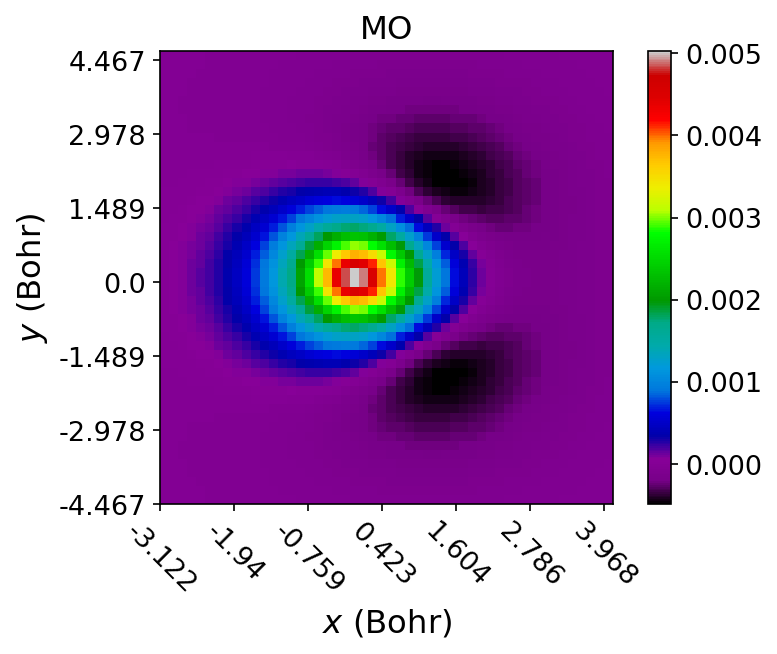

In [12]:
######## DFT calculation
basis = 'sto-6g'
functional = 'pbe'
mol = Mol()
mol.read_xyz('xyz_files/water.xyz')
mol1 = gto.M(atom=mol.pyscf_out(), basis=basis)
mf = dft.rks.RKS(mol1) 
mf.xc = functional
mf.kernel()
clear_output()
############## Evaluate MO ###############
res = 50 # sampling resolution, real resolution = res^3
C = mf.mo_coeff
## samples the lowest energy MO (orbital = 0), samples in MOcube and coordinates in steps (Bohr)
MOcube, steps = MO(mol1,C,orbital = 0,outfile = 'orbital', nx=res, ny=res, nz=res, save = True) 
print(steps)
vis_mat(MOcube[:,:,15],ranges = [steps[0,0],steps[0,1],steps[1,0],steps[1,1]],x_points = 7,y_points = 7,plot = False)
plt.title('MO')
plt.xlabel('$x$ (Bohr)')
plt.ylabel('$y$ (Bohr)')
plt.show()

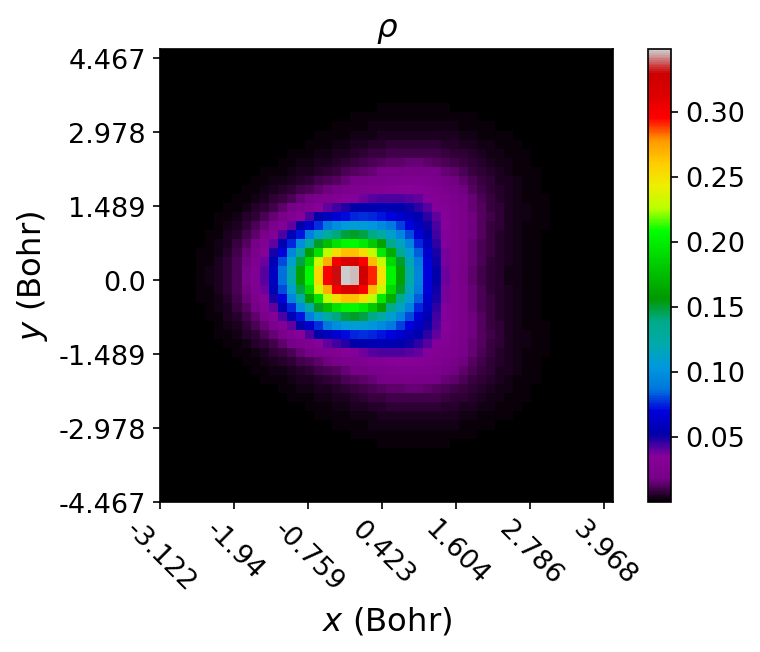

In [13]:
######## DFT calculation
basis = 'sto-6g'
functional = 'pbe'
mol = Mol()
mol.read_xyz('xyz_files/water.xyz')
mol1 = gto.M(atom=mol.pyscf_out(), basis=basis)
mf = dft.rks.RKS(mol1) 
mf.xc = functional
mf.kernel()
clear_output()
############## Evaluate MO ###############
res = 50 # sampling resolution, real resolution = res^3
C = mf.mo_coeff
e = mol1.nelec[0] 
dm = 2*C[:,:e] @ C.T[:e,:] # Density matrix multiplied by 2 for doubly-occupied MOs in closed-shell systems
## samples the lowest energy MO (orbital = 0), samples in MOcube and coordinates in steps (Bohr)
densitycube, steps = density(mol1, dm, outfile = 'rho', nx=res, ny=res, nz=res, save = True)
vis_mat(densitycube[:,:,15],ranges = [steps[0,0],steps[0,1],steps[1,0],steps[1,1]],x_points = 7,y_points = 7,plot = False)
plt.title('$ρ$')
plt.xlabel('$x$ (Bohr)')
plt.ylabel('$y$ (Bohr)')
plt.show()

## Can be reloaded form saved data

In [14]:
MOcube,steps = read_cube('orbital')
densitycube,steps = read_cube('rho')

# Matrices

Matrix elements are presented in the order of the Mol object.

(0), H: [-0.0154  -0.02643 -0.00336]
(1), H: [-0.49223  0.94519  1.41443]
(2), H: [1.06383 0.04772 1.41482]
(3), H: [-0.65236 -1.13195  2.53683]
(4), C: [0.00946 0.01718 1.09182]
(5), O: [-0.66754 -1.15644  1.56374]
converged SCF energy = -115.134078585895


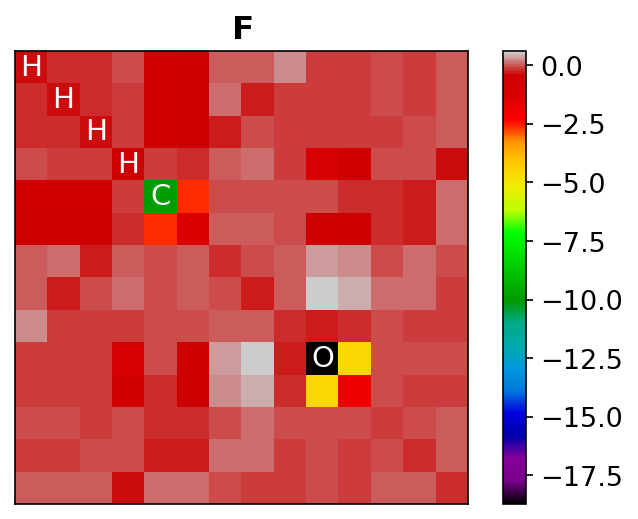

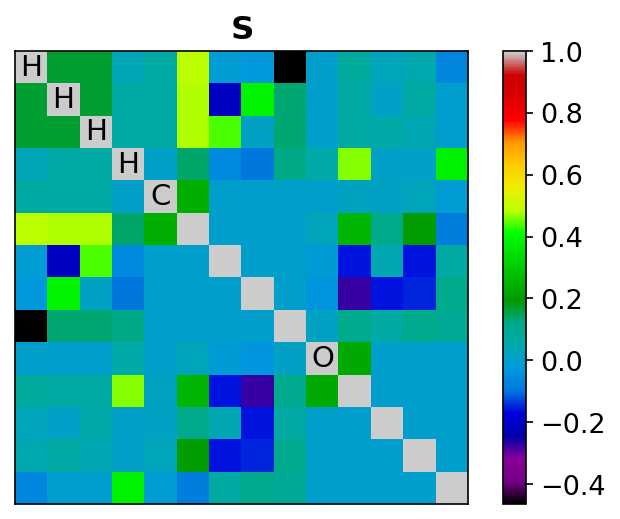

In [22]:
basis = 'sto-6g'
functional = 'pbe'
mol = Mol()
mol.read_xyz('xyz_files/methanol.xyz')
mol.print_geometry()
mol1 = gto.M(atom=mol.pyscf_out(), basis=basis)
mf = dft.rks.RKS(mol1) 
mf.xc = functional
mf.kernel()

# Pre-calculation
e = mol1.nelec[0] # Number of electrons/2 for closed-shell systems
S =  mol1.intor('int1e_ovlp_sph') # Overlap matrix



# Post-calculation
E = mf.energy_tot() # Total energy
F = mf.get_fock() # Fock matrix
C = mf.mo_coeff # Coefficient matrix
MOs = mf.mo_energy # MO energies

ax = vis_mat(F,plot = False,return_ax = True,labels = False)
plt.title('$\mathbf{F}$')
offset = 0
for i in mol.atoms:
    ax.text(0.5+offset, 0.5+offset, (i),ha="center", va="center", color="white",fontsize = 14)
    if i == 'H':
        offset += 1
    if i == 'C' or i == 'O' or i == 'N':
        offset += 5
plt.show()
ax = vis_mat(S,plot = False,return_ax = True,labels = False)
plt.title('$\mathbf{S}$')
offset = 0
for i in mol.atoms:
    ax.text(0.5+offset, 0.5+offset, (i),ha="center", va="center", color="black",fontsize = 14)
    if i == 'H':
        offset += 1
    if i == 'C' or i == 'O' or i == 'N':
        offset += 5
plt.show()

## Normalizing MOs

After solving

$$\mathbf{F} \mathbf{C}^{B} = (\mathbf{S}^{AO})^{-1} \mathbf{C}^{B} \text{diag}(\mathbf{\varepsilon})$$

we can go from an __orthogonal__ to  an __orthonormal__ basis by doing

$$C^B_{ji} \rightarrow \frac{C^B_{ji}}{\sqrt{S^B_{ii}}} = C^{N}_{ji},$$

where

$$\mathbf{S}^B = (\mathbf{C}^{B})^T \mathbf{S}^{AO} \mathbf{C}^B. $$

We can easily see this by writing $\mathbf{S}^B$ explicitly as

$$S_{ij}^B = \sum_{k_1} C^{B}_{k_1,i} <\psi_{k_1}^{AO}| \sum_{k_2} C^{B}_{k_2,j} |\psi_{k_2}^{AO}>$$

which for the diagonal this gives

$$ S_{ii}^B = \sum_{k_1}\sum_{k_2}  C^{B}_{k_1,i} C^{B}_{k_2,i} <\psi_{k_1}^{AO}|\psi_{k_2}^{AO}>. $$

This results in 

$$ 1 = \frac{\sum_{k_1}\sum_{k_2}  C^{B}_{k_1,i} C^{B}_{k_2,i} <\psi_{k_1}^{AO}|\psi_{k_2}^{AO}>}{S^B_{ii}} = S_{ii}^{N},$$

making the diagonal of $\mathbf{S}^N$ equal to $\mathbf{1}$. Note that the off-diagonal elements are not affected by this procedure since 

$$S^N_{ij} = \frac{S^B_{ij}}{\sqrt{S^B_{ii}S^B_{jj}}},  $$

meaning they are only scaled by a constant, still yielding zero. We can easily find $\mathbf{S}^N$ by doing

$$\mathbf{S}^N = (\mathbf{C}^{N})^T \mathbf{S}^{AO} \mathbf{C}^N. $$



## Initializing DFT + single SCF iteration \& normalization procedure

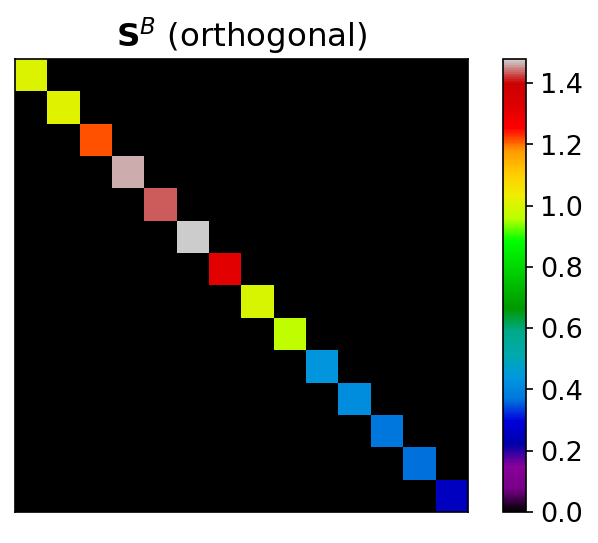

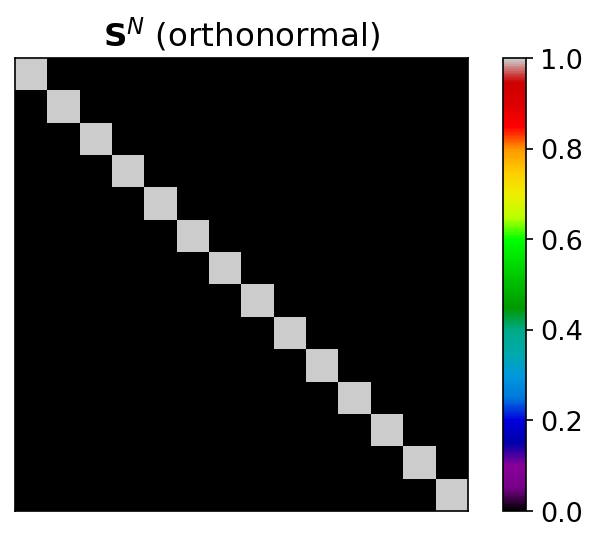



******** <class 'pyscf.dft.rks.RKS'> ********
method = RKS-RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/toby/Summary/Project/tmpkkdpq4qm
max_memory 4000 MB (current use 318 MB)
XC functionals = pbe
small_rho_cutoff = 1e-07
Set gradient conv threshold to 3.16228e-05
cond(S) = 9.408422721870373
nelec by numeric integration = 17.99999850335015
    CPU time for vxc      0.64 sec, wall time      0.09 sec
E1 = -236.7274384467897  Ecoul = 97.22258844509604  Exc = -15.537655550059462
init E= -115.116230421209
    CPU time for initialize scf      0.71 sec, wall time      0.10 sec
  HOMO = -0.0150495709328615  LUMO = 0.273589031285173
  mo_energy =
[-1.86002945e+01 -9.96173596e+00 -8.24794398e-01 -5.83300823e-01
 -3.79023763e-01 -3.58455868e-01 -3.17002897e-0

In [23]:
basis = 'sto-6g'
functional = 'pbe'
mol = Mol()
mol.read_xyz('xyz_files/methanol.xyz')
mol1 = gto.M(atom=mol.pyscf_out(), basis=basis)
mf = dft.rks.RKS(mol1) 
mf.xc = functional

### Generate initial density matrix based on free-atom densities
dm_guess = mf.init_guess_by_atom()
#### Calculate corresponding Fock matrix
F_guess = mf.get_fock(dm = dm_guess)
###############################################################################################
###############################################################################################
############################# DO YOUR MACHINE LEARNING CORRECTIONS HERE ##########################
###############################################################################################
###############################################################################################
#### Diagonalize this matrix
MOs_guess, C_guess = eig(np.linalg.inv(S)@ F_guess)
#### Calculate MO overlap matrix
SB = C_guess.T @ S @ C_guess
vis_mat(SB, labels = False, plot = False)
plt.title('$\mathbf{S}^B$ (orthogonal)')
plt.show()
#### normalize C matrix
for i in range(C_guess.shape[0]): 
        C_guess[:,i] /= np.sqrt(SB[i,i])
### Overlap matrix for orthonormal MOs
SN = C_guess.T @ S @ C_guess
vis_mat(SN, labels = False, plot = False)
plt.title('$\mathbf{S}^N$ (orthonormal)')
plt.show()
##### Resulting density matrix after 1 diagonalization
dm_guess2 =  2*C_guess[:,:e] @ C_guess.T[:e,:] 
##### Energy obtained from this density matrix
E1 = mf.energy_tot(dm = dm_guess2)
##### Continue using PySCF with obtained density matrix
mf.verbose = 5
mf.kernel(dm0 = dm_guess2)
E = mf.energy_tot()
print('\nEnergy after 1 iteration: ' + str(E1))
print('Converged energy: ' + str(E))

## Fock matrix

Can be split into density dependent part $\mathbf{B}$ and one-electron part

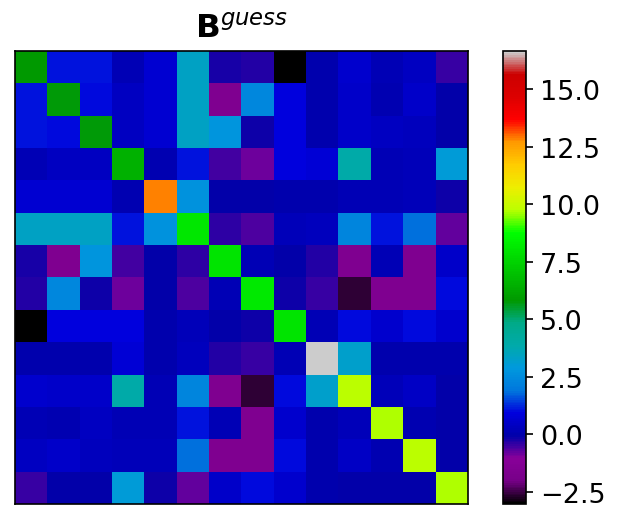

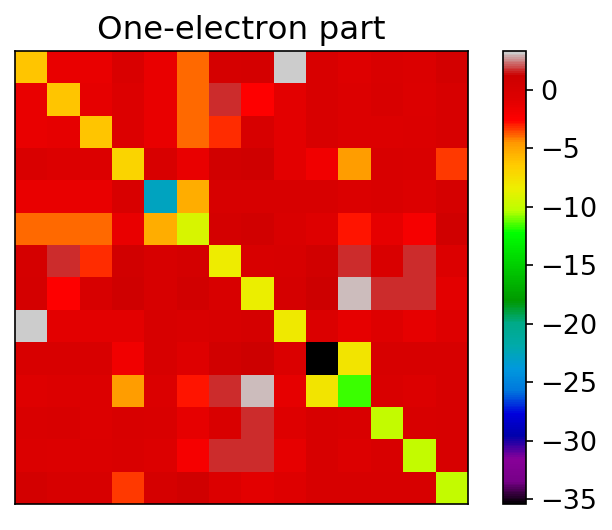

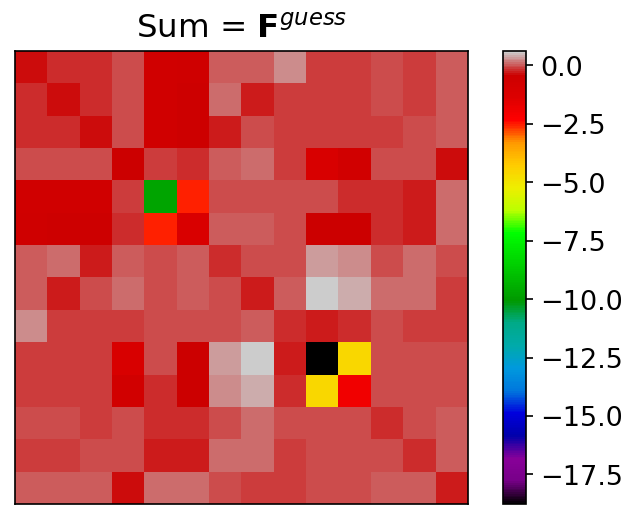

In [34]:
basis = 'sto-6g'
functional = 'pbe'
mol = Mol()
mol.read_xyz('xyz_files/methanol.xyz')
mol1 = gto.M(atom=mol.pyscf_out(), basis=basis)
mf = dft.rks.RKS(mol1) 
mf.xc = functional

### Generate initial density matrix based on free-atom densities
dm_guess = mf.init_guess_by_atom()
#### Calculate corresponding Fock matrix
B = mf.get_veff(dm = dm_guess)
h1e = mf.get_hcore()
vis_mat(B,labels = False,plot = False)
plt.title('$\mathbf{B}^{guess}$')
plt.show()
vis_mat(h1e,labels = False,plot = False)
plt.title('One-electron part')
plt.show()
vis_mat(h1e + B,labels = False,plot = False)
plt.title('Sum = $\mathbf{F}^{guess}$')
plt.show()